In this notebook, we will train a neural network to classify the MNIST dataset. The MNIST dataset is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. We will use the Keras API to build our neural network.

Note: We will only classify 0 and 1 digits from the MNIST dataset.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

Dataset

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

In [5]:
x_train = x_train[y_train < 2]
y_train = y_train[y_train < 2]
x_test = x_test[y_test < 2]
y_test = y_test[y_test < 2]

In [6]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (12665, 28, 28)
y_train shape: (12665,)
x_test shape: (2115, 28, 28)
y_test shape: (2115,)


Visualize a subset of the dataset

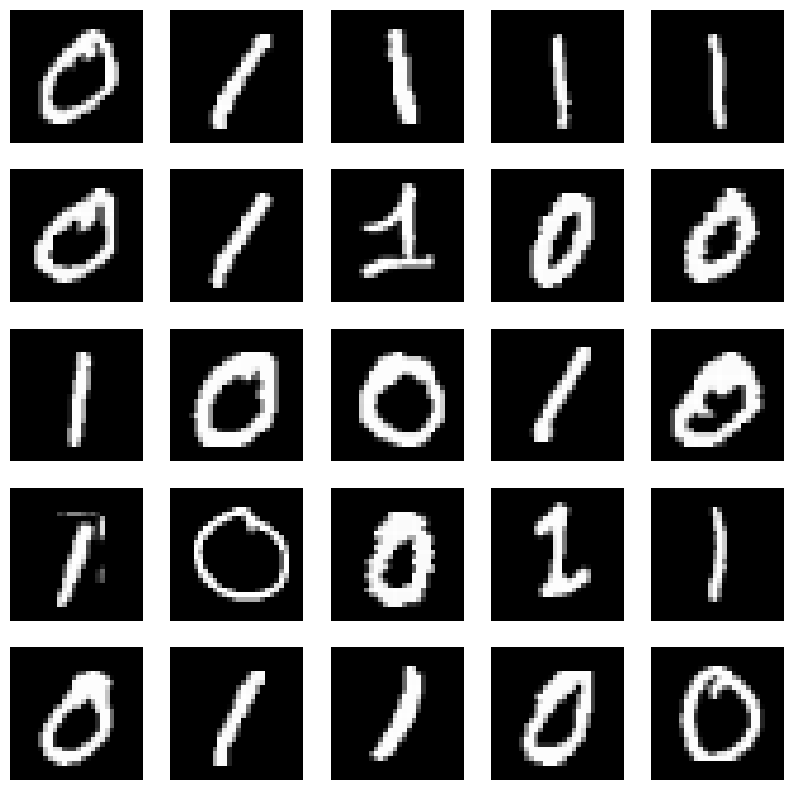

In [7]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [8]:
print(x_train[0].shape)

(28, 28)


The model

We will use a simple neural network with 3 layers and sigmoid activation functions:
- Input layer with 25 units
- Hidden layer with 15 units
- Output layer with 1 unit
the input shape is 28x28 = 784.

In [14]:
model = Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        Dense(25, activation='sigmoid'),
        Dense(15, activation='sigmoid'),
        Dense(1, activation='sigmoid')
    ]
)

In [15]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 25)             │        19,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,031 (78.25 KB)

 Trainable params: 20,031 (78.25 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# check the parameters
784*25 + 25 + 25*15 + 15 + 15*1 + 1

20031

In [17]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9435 - loss: 0.3038
Epoch 2/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9975 - loss: 0.0293
Epoch 3/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9987 - loss: 0.0133
Epoch 4/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9979 - loss: 0.0103
Epoch 5/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9994 - loss: 0.0059
Epoch 6/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9993 - loss: 0.0055
Epoch 7/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9986 - loss: 0.0067
Epoch 8/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9991 - loss: 0.0045
Epoch 9/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9992 - loss: 0.0040
Epoch 10/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9990 - loss: 0.0044


Evaluate the model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


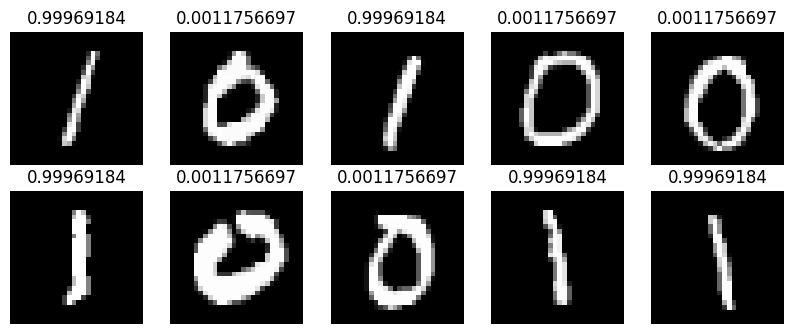

In [19]:
# predict the first 10 images
model.predict(x_test[:10])
# plot the first 10 images with their predictions
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(model.predict(x_test[i:i+1])[0][0])
    plt.axis('off')
plt.show()

In [23]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)
print('Test loss:', loss)

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9995 - loss: 0.0021
Test accuracy: 0.99858158826828
Test loss: 0.0035628126934170723


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


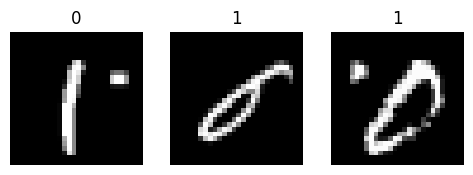

In [29]:
# plot the misclassified images
predictions = model.predict(x_test).reshape(-1)
predictions = (predictions > 0.5).astype(int)
misclassified = np.where(predictions != y_test)[0]
plt.figure(figsize=(10, 10))
for i in range(len(misclassified)):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[misclassified[i]], cmap='gray')
    plt.title(predictions[misclassified[i]])
    plt.axis('off')